In [1]:
# imports
import pandas as pd
import yfinance as yf

# set tickers and dates
tickers_list = ['SPY', 'IVV', 'VOO', 'SPLG', 'RSP', 'SPYG', 'VOOG', 'VOOV', 'SH']
start_date = '2024-1-1'
end_date = '2024-5-7'

# Fetch the data
data = yf.download(tickers_list, start_date , end_date)['Adj Close']
print(data.tail(10))


[                       0%%                      ]

[***********           22%%                      ]  2 of 9 completed

[****************      33%%                      ]  3 of 9 completed

[********************* 44%%                      ]  4 of 9 completed

[**********************56%%*                     ]  5 of 9 completed

[**********************67%%******                ]  6 of 9 completed

[**********************89%%*****************     ]  8 of 9 completed

[*********************100%%**********************]  9 of 9 completed

Ticker             IVV         RSP     SH       SPLG         SPY       SPYG  \
Date                                                                          
2024-04-23  508.170013  162.460007  12.34  59.480000  505.649994  70.500000   
2024-04-24  507.970001  162.690002  12.33  59.459999  505.410004  70.480003   
2024-04-25  505.820007  162.350006  12.39  59.230000  503.489990  70.169998   
2024-04-26  510.769989  162.429993  12.28  59.790001  508.260010  71.519997   
2024-04-29  512.590027  163.559998  12.25  60.000000  510.059998  71.669998   
2024-04-30  504.440002  161.199997  12.43  59.060001  501.980011  70.320000   
2024-05-01  502.859985  160.649994  12.49  58.840000  500.350006  70.040001   
2024-05-02  507.459991  161.639999  12.38  59.410000  505.029999  70.889999   
2024-05-03  513.840027  162.789993  12.23  60.130001  511.290009  72.250000   
2024-05-06  519.190002  164.039993  12.10  60.759998  516.570007  73.230003   

Ticker             VOO        VOOG        VOOV  
Da

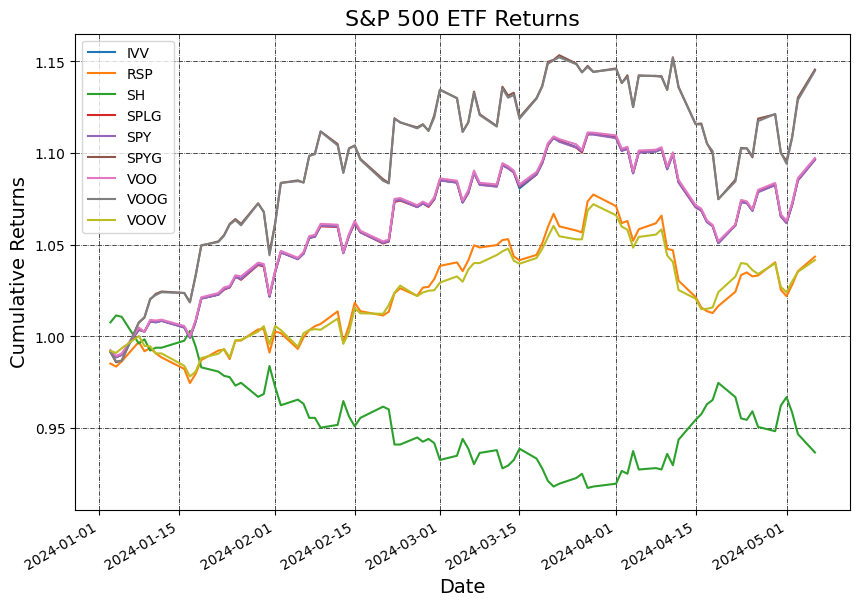

In [2]:
import matplotlib.pyplot as plt

# Plot all the close prices
((data.pct_change() + 1).cumprod()).plot(figsize=(10, 7))
plt.legend()
plt.title("S&P 500 ETF Returns", fontsize=16)
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()


In [3]:
# Show null values to handle them in data cleaning step
print("Null values in dataset:")
print(data.isnull().sum())


Null values in dataset:
Ticker
IVV     0
RSP     0
SH      0
SPLG    0
SPY     0
SPYG    0
VOO     0
VOOG    0
VOOV    0
dtype: int64


In [4]:
# Save the raw data to the raw_data folder
raw_data_path = '../data/raw_data/sp500_data.csv'
data.to_csv(raw_data_path)
print(f"Raw data saved to {raw_data_path}")


Raw data saved to ../data/raw_data/sp500_data.csv


In [5]:
# Cleaning data: Example of forward filling null values
cleaned_data = data.fillna(method='ffill')


C:\Users\16023\AppData\Local\Temp\ipykernel_22652\1350666825.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cleaned_data = data.fillna(method='ffill')


In [6]:
import plotly.express as px

# Ensure the directory exists
import os
external_data_dir = '../external_data'
if not os.path.exists(external_data_dir):
    os.makedirs(external_data_dir)

# Create a cumulative returns plot using Plotly
fig = px.line((cleaned_data.pct_change() + 1).cumprod(), title="S&P 500 ETF Cumulative Returns")
visual_path = os.path.join(external_data_dir, 'sp500_visuals.html')
fig.write_html(visual_path)
print(f"Interactive chart saved to {visual_path}")


Interactive chart saved to ../external_data\sp500_visuals.html


In [7]:
# Save the cleaned data
cleaned_data_path = '../data/cleaned_data/cleaned_sp500_data.csv'
cleaned_data.to_csv(cleaned_data_path)
print(f"Cleaned data saved to {cleaned_data_path}")


Cleaned data saved to ../data/cleaned_data/cleaned_sp500_data.csv
